**SVR INTUITION**  
* Invented in 90s by Vapnik and colleagues at Bell Labs.  
* Discussed in his 1992 book: "Nature of Statistical Learning Theory"  
* SVM = Support Vector Machine = Classification ; SVR = Support Vector Regression = Regression  


* Linear Regression utilizes Ordinary Least Squares (OLS) - minimizes sum(Y - Y.Hat)^2  
* SVR will produce a line with a band around it with width epsilon.  This is called the epsilon - insensitive tube.  
* Observations within the tube do not contribute to the overall error.  
* Observations outside the tube are considered.  Error is calculated as distance from the point to the boudary of the epsilon-insensitive tube.  
* Epsilon.sub.i for points above the epsilon-insensitive tube ; epsilon.sub.i.star for points below the epsilon-insensitive tube.  
* Formula:  (1/2)||w||^2 + C(SUM i = 1 to m) (epsilon.i + epsilon.i.star) ---> min  



**Non-Linear SVR**  
Course path to Non-Linear Kernel SVR:  
* SVM Intuition  
* Kernel SVM Intuition  
* Mapping to a higher dimension  
* The Kernel Trick  
* Types of Kernel Functions  
* Non-Linear Kernel SVR

This is the 2nd Non-Linear model we implement.  
The first was the Polynomial model.

**BEGIN CODING**  
Start with regression template:

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


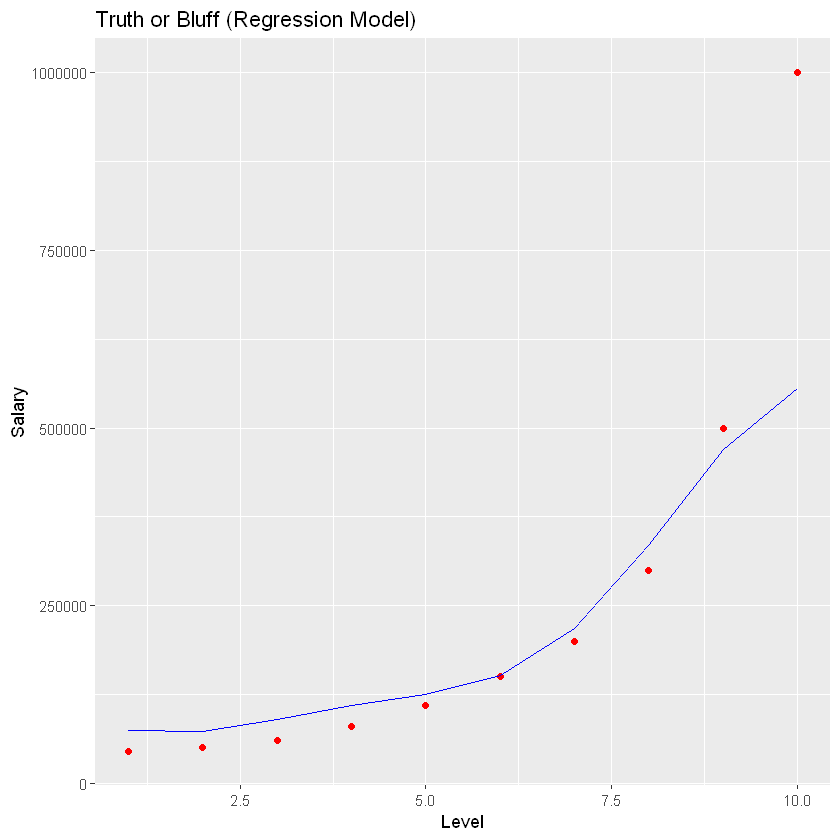

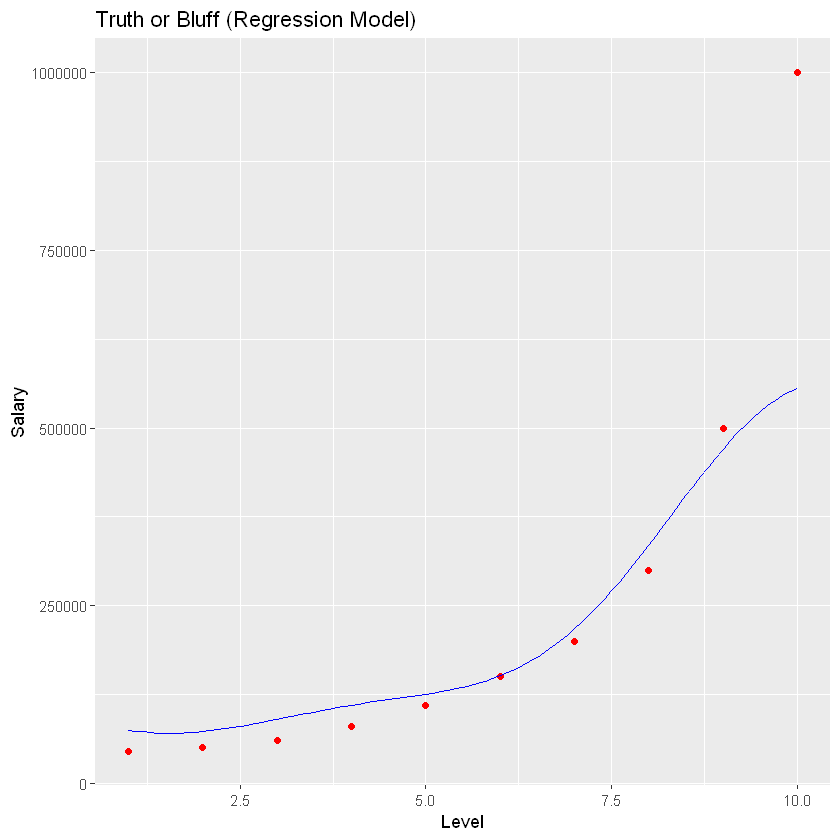

In [7]:
# Regression Template

# Importing the dataset
data.salaries = read.csv('Position_Salaries.csv')
data.salaries = data.salaries[2:3]

# Splitting the dataset into the Training set and Test set
# # install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Salary, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting the Regression Model to the dataset
# Create your regressor here

library(e1071)


regressor <- svm(Salary ~ .,
                data = data.salaries,
                type = 'eps-regression')



# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))

# Visualising the Regression Model results
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = data.salaries$Level, y = data.salaries$Salary),
             colour = 'red') +
  geom_line(aes(x = data.salaries$Level, y = predict(regressor, newdata = data.salaries)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

# Visualising the Regression Model results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(data.salaries$Level), max(data.salaries$Level), 0.1)
ggplot() +
  geom_point(aes(x = data.salaries$Level, y = data.salaries$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

* In the code above we use the svm() function from the e1071 package.  
* One of the arguments we selected in the svm() function is type = 'eps-regression'.  
* There are 5 options for this argument:  
1. c-classification  
2. nu-classification  
3. one-classification (for novelty detection)  
4. eps-regression  
5. nu-regression  

Clear to see some for classification and some for regression.  
Not sure what the difference is between types (nu ; c ; eps)


* In the second graph - used the following:  x_grid = seq(min(data.salaries$Level), max(data.salaries$Level), 0.1)  
* Wanted a more robust prediction grid to remove distance between lines which are connected linearly by default - which distorts from actuals.  